In [74]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Chemin du fichier csv
chemin_fichier = "E://Projet_SQL//logem_soc_2021_brut.csv"

df = pd.read_csv(chemin_fichier, sep=';', encoding='utf-8')  # Ou iso-8859-1 si ça coince
print(df.head(5))

  Code Commune   Département               Région  code_region  \
0        28040  Eure-et-Loir  CENTRE-VAL DE LOIRE         24.0   
1        28070  Eure-et-Loir  CENTRE-VAL DE LOIRE         24.0   
2        28085  Eure-et-Loir  CENTRE-VAL DE LOIRE         24.0   
3        28090  Eure-et-Loir  CENTRE-VAL DE LOIRE         24.0   
4        28227  Eure-et-Loir  CENTRE-VAL DE LOIRE         24.0   

   Taux de logements sociaux (%)  \
0                            0.0   
1                           10.0   
2                           31.0   
3                            0.0   
4                           16.0   

                                                geom  \
0  {"coordinates": [[[[1.209956998, 48.520591349]...   
1  {"coordinates": [[[[1.495640798, 48.473915202]...   
2  {"coordinates": [[[[1.515737493, 48.427185829]...   
3  {"coordinates": [[[[1.015929514, 48.675554898]...   
4  {"coordinates": [[[[1.583035441, 48.604331377]...   

                    centroid code_departement    

In [76]:
df.shape

(35228, 11)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35228 entries, 0 to 35227
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Commune                   35228 non-null  object 
 1   Département                    34815 non-null  object 
 2   Région                         34815 non-null  object 
 3   code_region                    34815 non-null  float64
 4   Taux de logements sociaux (%)  35228 non-null  float64
 5   geom                           34802 non-null  object 
 6   centroid                       34815 non-null  object 
 7   code_departement               34815 non-null  object 
 8   Nom Commune                    34815 non-null  object 
 9   epci                           34811 non-null  object 
 10  code_epci                      34811 non-null  float64
dtypes: float64(3), object(8)
memory usage: 3.0+ MB


In [78]:
df.isnull().sum()

Code Commune                       0
Département                      413
Région                           413
code_region                      413
Taux de logements sociaux (%)      0
geom                             426
centroid                         413
code_departement                 413
Nom Commune                      413
epci                             417
code_epci                        417
dtype: int64

### Suppression de lignes incomplètes

In [79]:
df_clean = df.dropna()
print(df_clean.shape)

(34798, 11)


In [80]:
df_clean.isnull().sum()

Code Commune                     0
Département                      0
Région                           0
code_region                      0
Taux de logements sociaux (%)    0
geom                             0
centroid                         0
code_departement                 0
Nom Commune                      0
epci                             0
code_epci                        0
dtype: int64

In [81]:
df_clean.describe()

,code_region,Taux de logements sociaux (%),code_epci
count,34798.000000,34798.000000,3.479800e+04
mean,52.453417,3.988994,2.125194e+08
std,24.193964,7.361732,2.002169e+07
min,11.000000,0.000000,2.000002e+08
25%,28.000000,0.000000,2.000660e+08
50%,44.000000,0.000000,2.000697e+08
75%,76.000000,5.000000,2.410004e+08
max,94.000000,157.000000,2.495005e+08


### **Correction d'une valeur aberrante dans les taux (%) de logements sociaux**

- Le .describe(), montre une maximale de **157%** dans la colonne `Taux de logements sociaux (%)`, ce qui est impossible. Le taux ne peut dépasser 100%. 
- Cette valeur aberrante doit donc être filtrée avant l'analyse.


In [82]:
# Identifier où est la valeur aberrante qui est 157
df_clean[df_clean['Taux de logements sociaux (%)'] > 100]

,Code Commune,Département,Région,code_region,Taux de logements sociaux (%),geom,centroid,code_departement,Nom Commune,epci,code_epci
7024,71085,Saône-et-Loire,BOURGOGNE-FRANCHE-COMTÉ,27.0,157.0,"{""coordinates"": [[[[4.649693474, 46.941475689]...","46.930650572, 4.628952666",71,Change,"CA Beaune, Côte et Sud - Communauté Beaune-Cha...",200006682.0


La commune identifiée avec un taux de 157% est Change, (Code Commune 71085). On l'enlèvera du df_clean

In [83]:
# Enlever du df_clean le Code commune '71085'
df_clean = df_clean[df_clean['Code Commune'] != '71085']


Remettre à zéro l'index le nouveau df sans lignes vides : df_clean

In [84]:
df_clean.reset_index(drop=True, inplace=True)

Vérifier s'il y a des doublons dans le df_clean :

In [85]:
df_clean.duplicated().sum()

0

Afficher les colonnes pour savoir quelles colonnes on gardera pour le projet :

In [86]:
df_clean.columns

Index(['Code Commune', 'Département', 'Région', 'code_region',
       'Taux de logements sociaux (%)', 'geom', 'centroid', 'code_departement',
       'Nom Commune', 'epci', 'code_epci'],
      dtype='object')

Garder uniquement les colonnes inutiles de df_clean

In [87]:
colonnes_utiles = ['Code Commune', 'Nom Commune', 'Département', 'code_departement', 'Région', 'Taux de logements sociaux (%)', 'geom']
df_reduit = df_clean[colonnes_utiles]

In [88]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34797 entries, 0 to 34796
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Commune                   34797 non-null  object 
 1   Nom Commune                    34797 non-null  object 
 2   Département                    34797 non-null  object 
 3   code_departement               34797 non-null  object 
 4   Région                         34797 non-null  object 
 5   Taux de logements sociaux (%)  34797 non-null  float64
 6   geom                           34797 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.9+ MB


In [89]:
df_reduit.head(5)

,Code Commune,Nom Commune,Département,code_departement,Région,Taux de logements sociaux (%),geom
0,28040,Billancelles,Eure-et-Loir,28,CENTRE-VAL DE LOIRE,0.0,"{""coordinates"": [[[[1.209956998, 48.520591349]..."
1,28070,Champhol,Eure-et-Loir,28,CENTRE-VAL DE LOIRE,10.0,"{""coordinates"": [[[[1.495640798, 48.473915202]..."
2,28085,Chartres,Eure-et-Loir,28,CENTRE-VAL DE LOIRE,31.0,"{""coordinates"": [[[[1.515737493, 48.427185829]..."
3,28090,Les Châtelets,Eure-et-Loir,28,CENTRE-VAL DE LOIRE,0.0,"{""coordinates"": [[[[1.015929514, 48.675554898]..."
4,28227,Maintenon,Eure-et-Loir,28,CENTRE-VAL DE LOIRE,16.0,"{""coordinates"": [[[[1.583035441, 48.604331377]..."


Analyse exploratoire

In [90]:
df_reduit['Taux de logements sociaux (%)'].mean()

3.9845963732505676

In [91]:
df_reduit['Taux de logements sociaux (%)'].unique()

array([ 0., 10., 31., 16.,  4.,  7.,  6.,  5., 18.,  1., 14.,  9., 11.,
        2., 17., 26., 23., 12.,  8.,  3., 13., 22., 30., 20., 15., 42.,
       29., 41., 19., 46., 32., 21., 34., 47., 35., 33., 25., 27., 24.,
       37., 45., 40., 63., 38., 39., 28., 44., 71., 43., 55., 58., 52.,
       56., 69., 54., 36., 53., 59., 48., 50., 49., 94., 68., 62., 57.,
       60., 65., 51., 86.])

In [92]:
#  Vérifier le type de variables
df_reduit.dtypes

Code Commune                      object
Nom Commune                       object
Département                       object
code_departement                  object
Région                            object
Taux de logements sociaux (%)    float64
geom                              object
dtype: object

In [93]:
print(df_reduit.shape)

(34797, 7)


In [94]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34797 entries, 0 to 34796
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code Commune                   34797 non-null  object 
 1   Nom Commune                    34797 non-null  object 
 2   Département                    34797 non-null  object 
 3   code_departement               34797 non-null  object 
 4   Région                         34797 non-null  object 
 5   Taux de logements sociaux (%)  34797 non-null  float64
 6   geom                           34797 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.9+ MB


**Avant de sauvegarder le fichier CSV pour des analyses futures**, formater la colonne `code_departement` (code département)  
en chaîne de caractères (`str`) avec complétion par zéro à gauche (`zfill(2)`).  
Cela garantit l'alignement entre les fichiers lors des jointures.  
Par exemple : `1` devient `01`, et les départements d’outre-mer (`974`, `976`, etc.) restent inchangés.

In [95]:
# Forcer la colonne 'code département' à deux chiffres (ex : '01', '35', '974') dans le df df_reduit
df_reduit = df_reduit.copy()
df_reduit['code_departement'] = df_reduit['code_departement'].astype(str).str.zfill(2)

### **Sauvegarde du df_reduit**

Le DataFrame final (`df_reduit`) est prêt pour des analyses futures.  
Il est sauvegardé sans données aberrantes ni données manquantes, et surtout avec la colonne code_departement en string  
pour faire des merges avec les autres fichiers csv. Il s'appelle **logem_soc_2021_projet.csv** :

In [ ]:
# df_reduit.to_csv('logem_soc_2021_projet.csv', index=False)

Vérification de la taille du fichier csv sauvegardé pour s'assurer qu'il respecte  
les limites de dépôt sur GitHub (limite ≈ 100 Mo par fichier).

In [97]:
import os

# Vérifier la taille du fichier sauvegardé (en Mo)
os.path.getsize('logem_soc_2021_projet.csv') / 1024**2

175.99137592315674

Le fichier `logem_soc_2021_projet.csv` étant trop volumineux pour GitHub (> 100 Mo),  
il sera **découpé manuellement via PowerShell** avant de l'exporter sur Github :

- `logem_soc_2021_projet_p1.csv`
- `logem_soc_2021_projet_p2.csv`

### **EDA approfondie à partir du fichier nettoyé 'df_reduit'**

In [98]:
df_reduit['Taux de logements sociaux (%)'].value_counts()

0.0     18519
2.0      1856
3.0      1742
1.0      1615
4.0      1470
        ...  
68.0        2
71.0        2
94.0        1
65.0        1
86.0        1
Name: Taux de logements sociaux (%), Length: 69, dtype: int64

In [99]:
# Combien de valeurs différentes de taux de logement sociaux existent ?
df_reduit['Taux de logements sociaux (%)'].nunique()

69

In [100]:
# Statistiques de base
df_reduit['Taux de logements sociaux (%)'].describe()

count    34797.000000
mean         3.984596
std          7.315995
min          0.000000
25%          0.000000
50%          0.000000
75%          5.000000
max         94.000000
Name: Taux de logements sociaux (%), dtype: float64

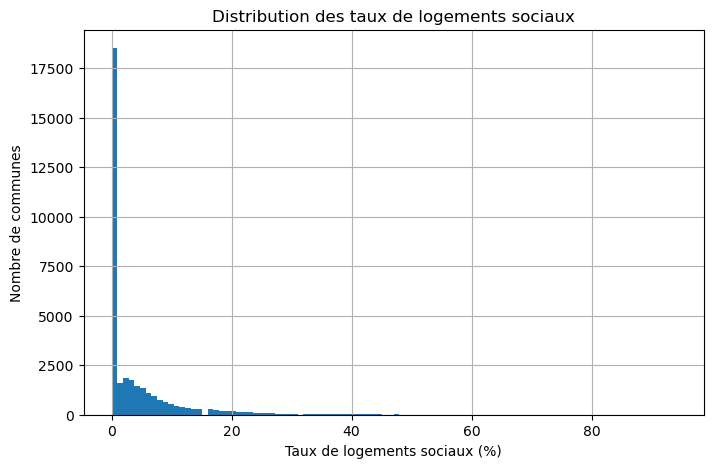

In [101]:
# Distribution visuelle simple du taux de logement sociaux
plt.figure(figsize=(8,5))
df_reduit['Taux de logements sociaux (%)'].hist(bins=100)
plt.xlabel('Taux de logements sociaux (%)')
plt.ylabel('Nombre de communes')
plt.title('Distribution des taux de logements sociaux')
plt.grid(True)
plt.show()

In [102]:
# Vérifier combien de communes en France sont à 0% de logements sociaux
nb_communes_total = df_reduit.shape[0]
nb_sans_logement_social = (df_reduit['Taux de logements sociaux (%)'] == 0).sum()
pourcentage = round((nb_sans_logement_social / nb_communes_total) * 100, 2)

print(f"Communes avec 0% de logements sociaux : {nb_sans_logement_social} sur {nb_communes_total} ({pourcentage}%)")

Communes avec 0% de logements sociaux : 18519 sur 34797 (53.22%)


In [103]:
# Cela montre que :
# - Sur la totalité de communes analysées (34 797) 18 519 n'offrent aucun logement social, soit 53,22% des communes.
# - La loi SRU impose des quotas de logements sociaux uniquement aux communes de plus de 3 500 habitants (ou 1 500 en Île-de-France).

In [104]:
# identifier les communes avec le plus fort taux de logement sociaux
cols = ['Code Commune', 'Nom Commune', 'Taux de logements sociaux (%)']
df_reduit.sort_values(by='Taux de logements sociaux (%)', ascending=False)[cols].head(5)

,Code Commune,Nom Commune,Taux de logements sociaux (%)
8695,78615,Thiverval-Grignon,94.0
30531,57058,Behren-lès-Forbach,86.0
2729,57207,Farébersviller,71.0
32782,27701,Val-de-Reuil,71.0
5234,93030,Dugny,69.0


In [105]:
# Calculler la moyenne du taux de logements sociaux par département
df_reduit.groupby('Département')['Taux de logements sociaux (%)'].mean().sort_values(ascending=False).head(10)

Département
Seine-Saint-Denis    35.225000
Hauts-de-Seine       27.861111
Val-de-Marne         27.723404
Paris                21.000000
Essonne              10.587629
Nord                 10.527778
Val-d'Oise            9.923913
Bouches-du-Rhône      9.644068
Maine-et-Loire        9.523256
Rhône                 9.468165
Name: Taux de logements sociaux (%), dtype: float64

In [106]:
# Calculler la moyenne du taux de logements sociaux par région
df_reduit.groupby('Région')['Taux de logements sociaux (%)'].mean().sort_values(ascending=False).head(10)

Région
ÎLE-DE-FRANCE                 9.887224
BRETAGNE                      5.488353
AUVERGNE-RHÔNE-ALPES          5.340864
PAYS DE LA LOIRE              5.339853
HAUTS-DE-FRANCE               5.261685
CENTRE-VAL DE LOIRE           4.941946
PROVENCE-ALPES-CÔTE D'AZUR    4.672669
NORMANDIE                     4.526792
GRAND EST                     2.955265
NOUVELLE-AQUITAINE            2.556072
Name: Taux de logements sociaux (%), dtype: float64